In [1]:
from TetriumColor import ColorSpace, ColorSampler, ColorSpaceType
from TetriumColor.Observer import Observer, Spectra, GetAdaptationMatrices
from TetriumColor.Measurement import load_primaries_from_csv
from TetriumColor.ColorMath.SubSpaceIntersection import receptor_isolate_spectral, excitations_to_contrast

import matplotlib.pyplot as plt

from typing import List, Tuple, Optional
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
wavelengths = np.arange(380, 781, 4)
observer = Observer.custom_observer(wavelengths, 0.5, 4)
primaries: List[Spectra] = load_primaries_from_csv("../../measurements/2025-05-21/primaries")

B_primary = np.array([p.data * 10000 for p in primaries]).T

metameric_axis = 2
cs_4d = ColorSpace(observer, cst_display_type='led',
                   display_primaries=primaries, metameric_axis=metameric_axis)

/Users/jessicalee/Projects/generalized-colorimetry/code/TetriumColor/TetriumColor/Observer/Observer.py:215: RuntimeWarning: divide by zero encountered in log10
  ex_temp1 = np.log10(-E + E * np.tanh(-((10 ** (vector - A2)) - F) / G)) + D
/Users/jessicalee/Projects/generalized-colorimetry/code/TetriumColor/TetriumColor/Observer/Observer.py:284: RuntimeWarning: divide by zero encountered in log
  log_data = np.log(self.wavelengths) + np.log(self.data)


In [4]:
cones_by_row = observer.observe_spectras(B_primary.T)

In [5]:
c_sampler = ColorSampler(cs_4d)

Target contrasts:  [ 0.    0.    0.01  0.  ]
Obtained Upper contrasts:  [-0.   -0.    0.01 -0.  ]
Obtained Lower Contrasts [ 0.    0.   -0.01  0.  ]


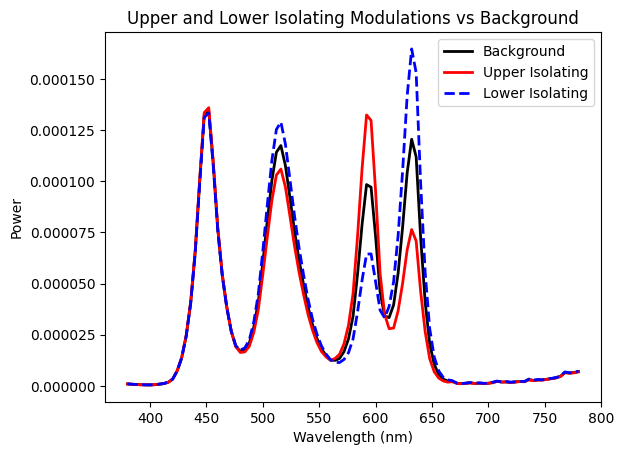

In [6]:
target_contrast = np.array([0, 0, 0.01, 0])
background = 0.5 * np.ones(4)
upper, lower = c_sampler.get_cone_contrast_metamers_brainard(target_contrast, background, isPlotResults=True)

plates = c_sampler.get_cone_contrast_plate(target_contrast, background, 35)

for i, plate_ext in enumerate(['RGB', 'OCV']):
    plates[i].save(f"plate_{plate_ext}.png")

In [7]:
luminance = 1.0
saturation = 0.5
cube_idx = 4
disp, cones = c_sampler.get_metameric_pairs(luminance, saturation, cube_idx)
print(disp)

Generating plates: 100%|██████████| 4096/4096 [00:02<00:00, 1564.41it/s]

[[[ 0.53687984  0.41452982  0.32187807  1.        ]
  [ 1.          0.50118724  0.31270967  0.67000533]]

 [[ 0.53472324  0.42074829  0.31960505  1.        ]
  [ 1.          0.50780925  0.31039395  0.66846865]]

 [[ 0.53238002  0.42710104  0.31734273  1.        ]
  [ 1.          0.51460045  0.30808525  0.666799  ]]

 ..., 
 [[ 0.          0.64334664  0.89006611  0.66595686]
  [ 0.93461523  0.81822856  0.87156351  0.        ]]

 [[ 0.          0.64944477  0.88688792  0.66282707]
  [ 0.93022283  0.8235048   0.86847228  0.        ]]

 [[ 0.          0.6553725   0.8837012   0.65982771]
  [ 0.92601348  0.82864489  0.86536889  0.        ]]]


In [8]:
six_p = cs_4d.convert(disp.reshape(-1, 4), ColorSpaceType.DISP, ColorSpaceType.DISP_6P).reshape(-1, 2, 6)
print(six_p)

[[[ 0.40523587  0.35912164  1.          0.24737893  0.35912164  1.        ]
  [ 0.75479806  0.43419598  0.67000533  0.24033257  0.43419598  0.67000533]]

 [[ 0.40360806  0.36450892  1.          0.24563201  0.36450892  1.        ]
  [ 0.75479806  0.43993286  0.66846865  0.23855283  0.43993286  0.66846865]]

 [[ 0.40183941  0.37001253  1.          0.24389331  0.37001253  1.        ]
  [ 0.75479806  0.44581632  0.666799    0.23677848  0.44581632  0.666799  ]]

 ..., 
 [[ 0.          0.55735363  0.66595686  0.68405905  0.55735363  0.66595686]
  [ 0.70544576  0.70885993  0.          0.66983891  0.70885993  0.        ]]

 [[ 0.          0.56263665  0.66282707  0.68161646  0.56263665  0.66282707]
  [ 0.70213039  0.71343093  0.          0.66746314  0.71343093  0.        ]]

 [[ 0.          0.56777205  0.65982771  0.67916731  0.56777205  0.65982771]
  [ 0.69895318  0.71788396  0.          0.66507804  0.71788396  0.        ]]]


In [14]:
rgbo=six_p[:,:,[0,1,3,2]].reshape(-1, 4)

In [16]:
(cones_by_row.T@rgbo.T).T.reshape(-1, 2, 4)

array([[[ 0.30005302,  0.49324773,  0.54606984,  0.57068412],
        [ 0.30005302,  0.49324773,  0.53783787,  0.57068412]],

       [[ 0.29874565,  0.49652   ,  0.54864308,  0.57274739],
        [ 0.29874565,  0.49652   ,  0.54037278,  0.57274739]],

       [[ 0.29745817,  0.49986152,  0.55126133,  0.57483675],
        [ 0.29745817,  0.49986152,  0.54294938,  0.57483675]],

       ..., 
       [[ 0.77753063,  0.57512728,  0.53549319,  0.50015205],
        [ 0.77753063,  0.57512728,  0.51888039,  0.50015205]],

       [[ 0.77547571,  0.57770137,  0.5372872 ,  0.50147397],
        [ 0.77547571,  0.57770137,  0.52075248,  0.50147397]],

       [[ 0.77339958,  0.58020487,  0.53903816,  0.50276848],
        [ 0.77339958,  0.58020487,  0.52257826,  0.50276848]]])